---
title: "Data Science Design Pattern for Student Score Modelling"
author: "Microsoft"
output: 
    rmarkdown::html_vignette:
        toc: true

vignette: >
  %\VignetteIndexEntry{Vignette Title}
  %\VignetteEngine{knitr::rmarkdown}
  %\VignetteEncoding{UTF-8}
---

In [2]:

knitr::opts_chunk$set(fig.width = 6,
                      fig.height = 4,
                      fig.align='center',
                      dev = "png")


# Introducation

Welcome to the Data Science Design Pattern for Student Score Modelling. This pattern provides a starting point for the data scientist exploring a new dataset. By no means is it the end point of the data science journey. The pattern is under regular revision and improvement and is provided as is. 

We now begin with the task of preparing our data for building models using R. 

# Pre-configuration

We load the R packages required for data preparation.

In [3]:
########################################################################
# R SETUP
# Load required packages from local library into R.

library(rattle)       # The normVarNames().
library(readr)        # Modern and efficient data reader.
library(dplyr)        # Wrangling: tbl_df(), group_by(), print(), glimpse().
library(magrittr)     # Pipe operator %>% %<>% %T>% equals().
library(lubridate)    # Dates and time.
library(tidyr)        # Tidy the dataset: gather().
library(stringi)      # String concat operator %s+%.
library(stringr)      # String manipulation: str_replace().
library(randomForest) # Impute missing values with na.roughfix()
library(FSelector)    # Feature selection: information.gain().
library(ggplot2)      # Visualise data.
library(tibble)       # Table data frame: rownames_to_column()

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'tidyr'

The following object is masked from 'package:magrittr':

    extract

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



Let's define some utility functions which simplify the coding.

In [4]:
# Useful utility functions.

echo <- function(x, big.mark=",", ...)
{
  format(x, big.mark=big.mark, ...) %>% cat("\n")
}

# Step 1.1: Load - Dataset

We use the studentScoreAUS dataset simulated from student data in UCI repository and an Australia Education Organization to illustrate our data preparation. Often though we will be loading the dataset from a CSV file and so we illustrate that step first. We begin by identifying the path to the CSV file we wish to load - in this case we load it from a local directory. Then it is a simple matter of reading the data into the memory of the computer, referring to it as variable studentScoreAUS.

In [5]:
########################################################################
# DATA INGESTION

# Identify the source location of the dataset.

dspath <- "C:/Users/zhouf/Documents/Revolution Analytics/Projects/Education2/Demo/studentScoreAUS_20161215.csv"

# Ingest the dataset.

studentScoreAUS <- read_csv(file=dspath)

# Name the dataset.

dsname <- "studentScoreAUS"

Parsed with column specification:
cols(
  student_id = col_character(),
  indigenous = col_logical(),
  english_language = col_logical(),
  father_occupation = col_character(),
  mother_occupation = col_character(),
  attendance_rate = col_double(),
  guardian = col_character(),
  level = col_integer(),
  score = col_double(),
  test_year = col_integer(),
  school_code = col_integer()
)


# Step 1.2: Load - Generic Variables

Next, we will store the variable studentScoreAUS to a generic variable ds and take a glimpse of it. This will make the following steps somewhat generic and often we can just load a different dataset into ds and these steps can simply be re-run without change. Finally, we save the variable studentScoreAUS into a data folder as a .RData file and reload it for testing.

In [6]:
# Prepare the dataset for usage with our template.

ds <- get(dsname)
glimpse(ds)

Observations: 1,222
Variables: 11
$ student_id        <chr> "s00058", "s00058", "s00243", "s00201", "s00288",...
$ indigenous        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ english_language  <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, ...
$ father_occupation <chr> "other", "other", "other", "services", "other", "...
$ mother_occupation <chr> "other", "other", "services", "health", "other", ...
$ attendance_rate   <dbl> 0.9333333, 0.9333333, 0.9600000, 1.0000000, 0.840...
$ guardian          <chr> "mother", "mother", "mixed", "mother", "mother", ...
$ level             <int> 5, 7, 5, 7, 7, 3, 9, 7, 9, 5, 7, 5, 9, 9, 3, 7, 3...
$ score             <dbl> 568.0, 481.0, 621.0, 530.0, 474.0, 487.0, 523.0, ...
$ test_year         <int> 2011, 2013, 2011, 2013, 2013, 2009, 2015, 2013, 2...
$ school_code       <int> 301, 301, 301, 301, 301, 301, 301, 301, 301, 301,...


In [7]:
# Save the dataset to disk as a binary backup if needed.

fpath <- "data"
fname <- file.path(fpath, dsname %s+% ".RData")
if (! dir.exists(fpath)) dir.create(fpath)
save(studentScoreAUS, file=fname)

# Remove the original dataset to save on memory.

rm(studentScoreAUS)

# Test the loading of the saved dataset and then cleanup.

load(fname) %>% print()

rm(studentScoreAUS)

[1] "studentScoreAUS"


# Step 2.1: Review - Dataset

We check the dimension and variable information of the dataset. There are 1,222 rows and 11 columns totally in the dataset, which includes variables showing information about test history, student demographic, school records and family information in various data types (chr, logi, int, and num).

In [8]:
########################################################################
# DATA OBSERVATION

# Basic size information.

nrow(ds) %>% echo()
ncol(ds) %>% echo()

1,222 
11 


In [9]:
# A glimpse into the dataset.

glimpse(ds)

Observations: 1,222
Variables: 11
$ student_id        <chr> "s00058", "s00058", "s00243", "s00201", "s00288",...
$ indigenous        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ english_language  <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, ...
$ father_occupation <chr> "other", "other", "other", "services", "other", "...
$ mother_occupation <chr> "other", "other", "services", "health", "other", ...
$ attendance_rate   <dbl> 0.9333333, 0.9333333, 0.9600000, 1.0000000, 0.840...
$ guardian          <chr> "mother", "mother", "mixed", "mother", "mother", ...
$ level             <int> 5, 7, 5, 7, 7, 3, 9, 7, 9, 5, 7, 5, 9, 9, 3, 7, 3...
$ score             <dbl> 568.0, 481.0, 621.0, 530.0, 474.0, 487.0, 523.0, ...
$ test_year         <int> 2011, 2013, 2011, 2013, 2013, 2009, 2015, 2013, 2...
$ school_code       <int> 301, 301, 301, 301, 301, 301, 301, 301, 301, 301,...


# Step 2.2: Review - Meta Data Cleansing

Then we review the variable names and convert them into a standard form using the function normVarNames() from rattle.

In [10]:
########################################################################
# DATA WRANGLING

# Review the variables to optionally normalise their names.

names(ds)

[1] "student_id"        "indigenous"        "english_language" 
 [4] "father_occupation" "mother_occupation" "attendance_rate"  
 [7] "guardian"          "level"             "score"            
[10] "test_year"         "school_code"

In [11]:
# Normalise the variable names.

names(ds) %<>% normVarNames() %T>% print()

 [1] "student_id"        "indigenous"        "english_language" 
 [4] "father_occupation" "mother_occupation" "attendance_rate"  
 [7] "guardian"          "level"             "score"            
[10] "test_year"         "school_code"      


In [12]:
# Review the dataset.

glimpse(ds)

Observations: 1,222
Variables: 11
$ student_id        <chr> "s00058", "s00058", "s00243", "s00201", "s00288",...
$ indigenous        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ english_language  <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, ...
$ father_occupation <chr> "other", "other", "other", "services", "other", "...
$ mother_occupation <chr> "other", "other", "services", "health", "other", ...
$ attendance_rate   <dbl> 0.9333333, 0.9333333, 0.9600000, 1.0000000, 0.840...
$ guardian          <chr> "mother", "mother", "mixed", "mother", "mother", ...
$ level             <int> 5, 7, 5, 7, 7, 3, 9, 7, 9, 5, 7, 5, 9, 9, 3, 7, 3...
$ score             <dbl> 568.0, 481.0, 621.0, 530.0, 474.0, 487.0, 523.0, ...
$ test_year         <int> 2011, 2013, 2011, 2013, 2013, 2009, 2015, 2013, 2...
$ school_code       <int> 301, 301, 301, 301, 301, 301, 301, 301, 301, 301,...


# Step 2.3: Review - Observations

Once we have normalized the variable names, the next step is to understand the shape of the dataset. A first look at the sample observations by using head(), tail(), and sample_n() give us an initial understanding of the data.

In [13]:
# Review the first few observations.

head(ds) %>% print.data.frame()

  student_id indigenous english_language father_occupation mother_occupation
1     s00058      FALSE             TRUE             other             other
2     s00058      FALSE             TRUE             other             other
3     s00243      FALSE             TRUE             other          services
4     s00201      FALSE             TRUE          services            health
5     s00288      FALSE             TRUE             other             other
6     s00070      FALSE             TRUE          services           teacher
  attendance_rate guardian level score test_year school_code
1       0.9333333   mother     5   568      2011         301
2       0.9333333   mother     7   481      2013         301
3       0.9600000    mixed     5   621      2011         301
4       1.0000000   mother     7   530      2013         301
5       0.8400000   mother     7   474      2013         301
6       0.9866667   mother     3   487      2009         301


In [14]:
# Review the last few observations.

tail(ds) %>% print.data.frame()

  student_id indigenous english_language father_occupation mother_occupation
1     s00370      FALSE             TRUE             other           at_home
2     s00141      FALSE             TRUE             other             other
3     s00062      FALSE             TRUE             other             other
4     s00332      FALSE             TRUE             other           at_home
5     s00107      FALSE            FALSE           teacher             other
6     s00164      FALSE            FALSE             other          services
  attendance_rate guardian level score test_year school_code
1       0.9733333   mother     9   456      2015         302
2       0.4133333   mother     5   629      2011         301
3       0.8533333   mother     3   546      2009         301
4       0.8933333   mother     3   450      2009         301
5       0.9466667   mother     3   356      2009         301
6       0.8466667   father     5   666      2011         301


In [15]:
# Review a random sample of observations.

sample_n(ds, size=6) %>% print.data.frame()

  student_id indigenous english_language father_occupation mother_occupation
1     s00087      FALSE             TRUE            health             other
2     s00123      FALSE             TRUE             other             other
3     s00011      FALSE             TRUE          services          services
4     s00053      FALSE            FALSE             other             other
5     s00238      FALSE             TRUE             other           at_home
6     s00060      FALSE             TRUE           teacher          services
  attendance_rate guardian level score test_year school_code
1       0.9733333   father     7   574      2013         301
2       0.9600000   mother     3   453      2009         301
3       1.0000000   mother     7   642      2013         301
4       1.0000000   mother     5   592      2011         301
5       0.9333333    other     3   479      2009         301
6       0.9866667   mother     9   626      2015         301


# Step 2.4: Review - Summary

Next, we use summary() to preview the distributions of each variable.

In [16]:
# Traditional dataset summary to get started.

summary(ds)

  student_id        indigenous      english_language father_occupation 
 Length:1222        Mode :logical   Mode :logical    Length:1222       
 Class :character   FALSE:1202      FALSE:58         Class :character  
 Mode  :character   TRUE :20        TRUE :1164       Mode  :character  
                    NA's :0         NA's :0                            
                                                                       
                                                                       
 mother_occupation  attendance_rate    guardian             level      
 Length:1222        Min.   :0.4000   Length:1222        Min.   :3.000  
 Class :character   1st Qu.:0.9200   Class :character   1st Qu.:3.000  
 Mode  :character   Median :0.9600   Mode  :character   Median :5.000  
                    Mean   :0.9388                      Mean   :5.957  
                    3rd Qu.:0.9867                      3rd Qu.:7.000  
                    Max.   :1.0000                      Max.   :

# Step 2.5: Review - Data Formats

Except for the generic data wrangling, we now do data wrangling customized for studentScoreAUS. For example, we check the number of unique schools in the dataset. Moreover, we may need to correct the format of some of the variables in our dataset. We might first check the data type of each variable. Noting that there are categorical variables in the formats of character, logical and integer, we may like to convert them to factor.

In [17]:
####################################
# studentScoreAUS data wrangling.

# How many schools are represented in the dataset? (Why we need to know this)

ds$school_code %>% 
  unique() %>%
  length()

[1] 2

In [18]:
# Check the class of all the variables.

ds %>% sapply(class)

student_id        indigenous  english_language father_occupation 
      "character"         "logical"         "logical"       "character" 
mother_occupation   attendance_rate          guardian             level 
      "character"         "numeric"       "character"         "integer" 
            score         test_year       school_code 
        "numeric"         "integer"         "integer"

In [19]:
# Select all the character variables.

ds %>%
  sapply(is.character) %>%
  which(useNames=TRUE) %>%
  names() %T>% 
  print() ->
vnames

[1] "student_id"        "father_occupation" "mother_occupation"
[4] "guardian"         


In [20]:
# Review the values of the variables.

ds[vnames] %>%
  sapply(as.factor) %>%
  summary()

   student_id   father_occupation mother_occupation   guardian  
 s00004 :   4   at_home : 56      at_home :167      father:270  
 s00008 :   4   health  : 50      health  :102      mixed : 21  
 s00012 :   4   other   :670      other   :452      mother:880  
 s00015 :   4   services:344      services:301      other : 51  
 s00019 :   4   teacher :102      teacher :200                  
 s00021 :   4                                                   
 (Other):1198                                                   

In [21]:
# Choose to convert these variables from character to factor.

vnames %<>% setdiff(c("student_id")) %T>% print()

ds[vnames] %<>% 
  lapply(factor) %>% 
  data.frame() %>% 
  tbl_df() %T>%
  {head(.) %>% print()}

# Confirm they are now factors.

ds[vnames] %>% sapply(class)

[1] "father_occupation" "mother_occupation" "guardian"         
# A tibble: 6 x 3
  father_occupation mother_occupation guardian
             <fctr>            <fctr>   <fctr>
1             other             other   mother
2             other             other   mother
3             other          services    mixed
4          services            health   mother
5             other             other   mother
6          services           teacher   mother


father_occupation mother_occupation          guardian 
         "factor"          "factor"          "factor"

In [22]:
# Select all the logical variables.

ds %>%
  sapply(is.logical) %>%
  which(useNames=TRUE) %>%
  names() %T>% 
  print() ->
vnames

[1] "indigenous"       "english_language"


In [23]:
# Decide to convert these variables from logical to factor.

ds[vnames] %>% head()

indigenous,english_language
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE


In [24]:
ds[vnames] %<>% 
  lapply(factor) %>% 
  data.frame() %>% 
  tbl_df() %T>%
  {head(.) %>% print()}

# A tibble: 6 x 2
  indigenous english_language
      <fctr>           <fctr>
1      FALSE             TRUE
2      FALSE             TRUE
3      FALSE             TRUE
4      FALSE             TRUE
5      FALSE             TRUE
6      FALSE             TRUE


In [25]:
# Select all the integer variables.

ds %>%
  sapply(is.integer) %>%
  which(useNames=TRUE) %>%
  names() %T>% 
  print() ->
vnames

[1] "level"       "test_year"   "school_code"


In [26]:
# Decide to convert these variables from integer to factor.

ds[vnames] %>% head()

level,test_year,school_code
5,2011,301
7,2013,301
5,2011,301
7,2013,301
7,2013,301
3,2009,301


In [27]:
ds[vnames] %<>% 
  lapply(factor) %>% 
  data.frame() %>% 
  tbl_df() %T>%
  {head(.) %>% print()}

# A tibble: 6 x 3
   level test_year school_code
  <fctr>    <fctr>      <fctr>
1      5      2011         301
2      7      2013         301
3      5      2011         301
4      7      2013         301
5      7      2013         301
6      3      2009         301


In [28]:
# Review the distribution of observations across levels.

ds[, sapply(ds, is.factor)] %>% sapply(table)

$indigenous

FALSE  TRUE 
 1202    20 

$english_language

FALSE  TRUE 
   58  1164 

$father_occupation

 at_home   health    other services  teacher 
      56       50      670      344      102 

$mother_occupation

 at_home   health    other services  teacher 
     167      102      452      301      200 

$guardian

father  mixed mother  other 
   270     21    880     51 

$level

  3   5   7   9 
319 303 296 304 

$test_year

2009 2011 2013 2015 
 319  303  296  304 

$school_code

 301  302 
1085  137 


In [29]:
# Note the remaining variables to be dealt with.

sapply(ds, class)

student_id        indigenous  english_language father_occupation 
      "character"          "factor"          "factor"          "factor" 
mother_occupation   attendance_rate          guardian             level 
         "factor"         "numeric"          "factor"          "factor" 
            score         test_year       school_code 
        "numeric"          "factor"          "factor"

In [30]:
vnames <- c("score", "attendance_rate") 

# Review the values.

head(ds[vnames])
sample_n(ds[vnames], 6)

score,attendance_rate
568,0.9333333
481,0.9333333
621,0.9600000
530,1.0000000
474,0.8400000
487,0.9866667


score,attendance_rate
480,0.9733333
629,0.9866667
513,0.8666667
668,0.9466667
627,0.9866667
493,1.0000000


In [31]:
# Check the current class of the variables.

ds[vnames] %>% sapply(class)

score attendance_rate 
      "numeric"       "numeric"

# Step 2.6: Review - Variable Roles

We are now in a position to identify the roles played by the variables within the dataset. We assign the variable score which we are going to predict to be our target variable and put it in front of all. From our observations so far we note that the variable test_year is not relevant to the modelling. Also we treat the varaibles student_id and school_code as observation identifiers.

In [32]:
####################################
# Variable Roles

# Note the available variables.

vars <- names(ds) %T>% print()

 [1] "student_id"        "indigenous"        "english_language" 
 [4] "father_occupation" "mother_occupation" "attendance_rate"  
 [7] "guardian"          "level"             "score"            
[10] "test_year"         "school_code"      


In [33]:
# Note the target variable.

target <- "score"

# Place the target variable at the beginning of the vars.

vars <- c(target, vars) %>% unique() %T>% print()

# Note any identifiers.

id <- c("student_id", "school_code", "test_year")

 [1] "score"             "student_id"        "indigenous"       
 [4] "english_language"  "father_occupation" "mother_occupation"
 [7] "attendance_rate"   "guardian"          "level"            
[10] "test_year"         "school_code"      


# Step 3.1: Clean - Ignore IDs, Outputs, Missing

## IDs and Outputs 

We will want to ignore some variables that are irrelevant or inappropriate for modelling as normal predictors. We start with the identifiers and the risk variable (there is no risk variable in this case).

In [34]:
####################################
# Generic data wrangling.

# Initialise ignored variables: identifiers and risk.

ignore <- union(id, if (exists("risk")) risk) %T>% print()

[1] "student_id"  "school_code" "test_year"  


We might also identify any variable that has a unique value for every observation. These are sometimes identifiers as well and if so are candidates for ignoring.

In [35]:
# Heuristic for candidate indentifiers to possibly ignore. 

ds[vars] %>%
  sapply(function(x) x %>% unique() %>% length()) %>%
  equals(nrow(ds)) %>%
  which() %>%
  names() %T>%
  print() ->
ids

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, ids) %T>% print()

character(0)
[1] "student_id"  "school_code" "test_year"  


## All Missing

We then remove any variable where all of the values are missing.

In [36]:
# Identify variables with only missing values.

ds[vars] %>%
  sapply(function(x) x %>% is.na %>% sum) %>%
  equals(nrow(ds)) %>%
  which() %>%
  names() %T>%
  print() ->
missing

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, missing) %T>% print()

character(0)
[1] "student_id"  "school_code" "test_year"  


## Many Missing

Perhaps we also want to ignore variables with more than 70% of the values missing.

In [37]:
# Identify a threshold above which proportion missing is fatal.

missing.threshold <- 0.7

# Identify variables that are mostly missing.

ds[vars] %>%
  sapply(function(x) x %>% is.na() %>% sum()) %>%
  '>'(missing.threshold*nrow(ds)) %>%
  which() %>%
  names() %T>%
  print() ->
mostly

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, mostly) %T>% print()

character(0)
[1] "student_id"  "school_code" "test_year"  


# Step 3.2: Clean - Ignore MultiLevel, Constants

## Too Many Levels

We might also want to ignore variables with too many levels.

In [38]:
# Identify a threshold above which we have too many levels.

levels.threshold <- 20

# Identify variables that have too many levels.

ds[vars] %>%
  sapply(is.factor) %>%
  which() %>%
  names() %>%
  sapply(function(x) ds %>% extract2(x) %>% levels() %>% length()) %>%
  '>='(levels.threshold) %>%
  which() %>%
  names() %T>%
  print() ->
too.many

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, too.many) %T>% print()

character(0)
[1] "student_id"  "school_code" "test_year"  


## Constants

We ingore variables with constant values as well.

In [39]:
# Identify variables that have a single value.

ds[vars] %>%
  sapply(function(x) all(x == x[1L])) %>%
  which() %>%
  names() %T>%
  print() ->
constants 

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, constants) %T>% print()

character(0)
[1] "student_id"  "school_code" "test_year"  


# Step 3.3: Clean - Ignore Correlated Varaibles

Within all the numeric varaibles, we can identify pairs where we want to keep one but not the other, because they are highly correlated. We will select them manually since it is a judgement call. Normally we might limit the removals to those correlations that are 0.95 or more. In this case, there does not exist a collinearity.

In [40]:
# Note which variables are numeric.

vars %>%
  setdiff(ignore) %>%
  '['(ds, .) %>%
  sapply(is.numeric) %>% 
  which() %>%
  names() %T>%
  print() ->
numc

[1] "score"           "attendance_rate"


In [41]:
# For the numeric variables generate a table of correlations

ds[numc] %>%
  cor(use="complete.obs") %>%
  ifelse(upper.tri(., diag=TRUE), NA, .) %>% 
  abs %>% 
  data.frame %>%
  tbl_df %>%
  set_colnames(numc) %>%
  mutate(var1=numc) %>% 
  gather(var2, cor, -var1) %>% 
  na.omit %>%
  arrange(-abs(cor)) %T>%
  print() ->
mc

# A tibble: 1 x 3
             var1  var2       cor
            <chr> <chr>     <dbl>
1 attendance_rate score 0.1722439


In [42]:
# Any variables could be removed because highly correlated?

ignore <- union(ignore, NULL) %T>% print()

[1] "student_id"  "school_code" "test_year"  


# Step 3.4: Clean - Remove the Ignored Variables

Once we have identified the variables to ignore, we remove them from our list of variables to use.

In [43]:
# Check the number of variables currently.

length(vars)

[1] 11

In [44]:
# Remove the variables to ignore.

vars <- setdiff(vars, ignore) %T>% print()

[1] "score"             "indigenous"        "english_language" 
[4] "father_occupation" "mother_occupation" "attendance_rate"  
[7] "guardian"          "level"            


In [45]:
# Confirm they are now ignored.

length(vars)

[1] 8

# Step 3.5: Clean - Feature Selection

The FSelector (Romanski, 2013) package provides functions to identify subsets of variables that might be more effective for modelling. For example, we can use correlation search function cfs() to identify key variables and thus decide which variables to retain.

In [46]:
####################################
# Variable Selection

# Formula for modelling.

form <- formula(target %s+% " ~ .") %T>% print()

score ~ .


In [47]:
# Use correlation search to identify key variables.
# Could be useful to decide which variables to retain.

cfs(form, ds[vars])

[1] "indigenous"      "attendance_rate"

In [48]:
# Any variables to remove because not useful?

vars %<>% setdiff(NULL) %T>% print()

[1] "score"             "indigenous"        "english_language" 
[4] "father_occupation" "mother_occupation" "attendance_rate"  
[7] "guardian"          "level"            


Or, we can use the function information.gain() to identify varaible importance and decide which varaibles to remove.

In [49]:
# Use information gain to identify variable importance.

information.gain(form, ds[vars]) %>%
  rownames_to_column() %>%
  arrange(attr_importance)

# Any variables to remove because not useful?

vars %<>% setdiff(NULL)

rowname,attr_importance
attendance_rate,0.000000000
indigenous,0.004184051
english_language,0.004523435
guardian,0.014006316
mother_occupation,0.014825539
father_occupation,0.024635172
level,0.087427661


# Step 3.6: Clean - Remove Missing Target

In addition to varaibles, sometimes there may be further cleansing with the observations. Here, we remove observations with a missing target first.

In [50]:
####################################
# Continue Wrangling

# Check the dimensions to start with.

dim(ds) %>% echo()

1,222    11 


In [51]:
# Identify observations with a missing target.

ds %>% 
  extract2(target) %>% 
  is.na() %T>%
  {sum(.) %>% print()} ->
missing.target 

[1] 0


In [52]:
# Remove observations with a missing target.

ds %<>% filter(!missing.target)

# Confirm the filter delivered the expected dataset.

dim(ds) %>% echo()

1,222    11 


# Step 3.7: Clean - Deal with Missing Values

To clean observatons with missing predictors, we can impute missing values in the data by using na.roughfix() from package randomForest (Breiman et al, 2012).

In [53]:
####################################
## Optional missing value imputation.

# Count the number of missing values.

ds[vars] %>%  is.na() %>% sum() %>% echo()

0 


In [54]:
# Impute missing values.

ds[vars] %<>% na.roughfix()

In [55]:
# Confirm that no missing values remain.

ds[vars] %>%  is.na() %>% sum() %>% echo()

0 


Alternatively, we can simply remove observations that have missing values. Here na.omit() identifies the rows to omit based on the vars to be included for modelling. This list of rows to omit is stored as the na.action attribute of the returned object. We then remove these observations from the dataset.

In [56]:
####################################
# Optional remove observations with missing values.

# Initialise the list of observations to be removed.

omit <- NULL

# Review the current dataset.

ds[vars] %>% nrow() %>% echo()
ds[vars] %>% is.na() %>% sum() %>% echo()

1,222 
0 


In [57]:
# Identify any observations with missing values.

ds[vars] %>%
  na.omit() %>%
  attr("na.action") %T>%
  print() ->
mo

NULL


In [58]:
# Record the observations to omit.

omit <- union(omit, mo) %T>% {length(.) %>% print()}

[1] 0


In [59]:
# If there are observations to omit then remove them.

if (length(omit)) ds <- ds[-omit,]

# Confirm the observations have been removed.

ds[vars] %>% nrow() %>% echo()
ds[vars] %>% is.na() %>% sum() %>% echo()

1,222 
0 


# Step 3.8: Clean - Normalise Factors

Some variables will have levels with spaces, and mixture of cases, etc. We may like to normalise the levels for each of the categoric variables.

In [60]:
####################################
# Normalise factors.

# Note which variables are categoric.

ds[vars] %>%
  sapply(is.factor) %>%
  which() %>%
  names() %T>%
  print() ->
catc

[1] "indigenous"        "english_language"  "father_occupation"
[4] "mother_occupation" "guardian"          "level"            


In [61]:
# Check the levels.

ds[catc] %>% sapply(levels)

$indigenous
[1] "FALSE" "TRUE" 

$english_language
[1] "FALSE" "TRUE" 

$father_occupation
[1] "at_home"  "health"   "other"    "services" "teacher" 

$mother_occupation
[1] "at_home"  "health"   "other"    "services" "teacher" 

$guardian
[1] "father" "mixed"  "mother" "other" 

$level
[1] "3" "5" "7" "9"

In [62]:
# Normalise the levels of all categoric variables.

for (v in catc) 
  levels(ds[[v]]) %<>% normVarNames()

# Review the levels.

ds[catc] %>% sapply(levels)

$indigenous
[1] "false" "true" 

$english_language
[1] "false" "true" 

$father_occupation
[1] "at_home"  "health"   "other"    "services" "teacher" 

$mother_occupation
[1] "at_home"  "health"   "other"    "services" "teacher" 

$guardian
[1] "father" "mixed"  "mother" "other" 

$level
[1] "3" "5" "7" "9"

# Step 3.9: Clean - Ensure Target is Numeric

For regression models, we want to ensure the target is numeric.

In [63]:
# Ensure the target is numeric.

class(ds[[target]])

ds[[target]] %<>% as.numeric()

# Confirm the distribution.

ds[target] %>% summary()

[1] "numeric"

     score      
 Min.   :302.4  
 1st Qu.:481.0  
 Median :544.0  
 Mean   :550.7  
 3rd Qu.:623.0  
 Max.   :798.0  

Here, we visualise the distribution of the target variable using ggplot2.

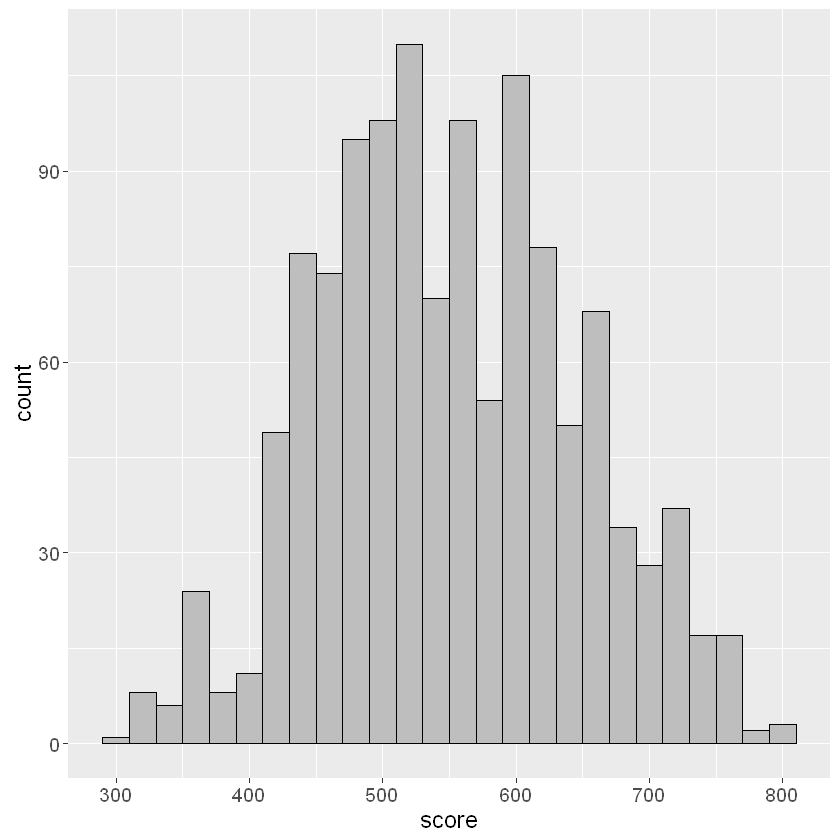

In [64]:
ds %>%
  ggplot(aes_string(x=target)) +
  geom_histogram(fill="grey", col="black", binwidth=20) +
  theme(text=element_text(size=14))

# Step 4.1: Prepare - Variable

We are now ready to identify the variables that we will use to build the model. Previously we identified the variable roles. Now we identify those that we wish to model. We begin with the model input variables, identifying them as a vector of characters (the variable name) and a vector of integers (the variable index).

In [65]:
########################################################################
# VARIABLE ROLES

# Identify the input variables by name.

inputs <- setdiff(vars, target) %T>% print()

[1] "indigenous"        "english_language"  "father_occupation"
[4] "mother_occupation" "attendance_rate"   "guardian"         
[7] "level"            


In [66]:
# Identify the input variables by index.

inputi <- sapply(inputs, 
                 function(x) which(x == names(ds)), 
                 USE.NAMES=FALSE) %T>% print()

[1] 2 3 4 5 6 7 8


For convenience we record the number of observations.

In [67]:
nobs <- nrow(ds) %T>% echo()

1,222 


Here we simply report on the dimensions of various data subsets.

In [68]:
# Confirm various subset sizes.

dim(ds) %>% echo()
dim(ds[vars]) %>% echo()
dim(ds[inputs]) %>% echo()
dim(ds[inputi]) %>% echo()

1,222    11 
1,222     8 
1,222     7 
1,222     7 


# Step 4.2: Prepare - Numeric and Categoric Variables

Sometimes we need to identify the numeric and categoric variables. Many cluster analysis algorithms only deal with numeric variables, for example. Here we identify them both by name and by index. Note that when using the index we have to assume the variables always remain in the same order within the dataset and all variables are present. Otherwise the indicies will get out of sync.

In [69]:
# Identify the numeric variables by index.

ds %>%
  sapply(is.numeric) %>%
  which() %>%
  intersect(inputi) %T>%
  print() ->
numi

[1] 6


In [70]:
# Identify the numeric variables by name.

numc <- 
  ds %>% 
  names() %>% 
  '['(numi) %T>% 
  print()

[1] "attendance_rate"


In [71]:
# Identify the categoric variables by index.

ds %>%
  sapply(is.factor) %>%
  which() %>%
  intersect(inputi) %T>%
  print() ->
cati

[1] 2 3 4 5 7 8


In [72]:
# Identify the categoric variables by name.

ds %>% 
  names() %>% 
  '['(cati) %T>% 
  print() ->
catc

[1] "indigenous"        "english_language"  "father_occupation"
[4] "mother_occupation" "guardian"          "level"            


# Step 4.3: Prepare - Save Dataset

For large datasets we may want to save it to a bianry .RData file once we have it in the right shape.

In [73]:
########################################################################
# SAVE THE DATASET

# We will use a fixed timestamp to identify our file for convenience.

dsdate <- "_20161215"

# Filename for the saved dataset.

dsrdata <- 
  file.path(fpath, dsname %s+% dsdate %s+% ".RData") %T>% 
  print()

# Save relevant R objects to the binary RData file.

save(ds, dsname, dspath, dsdate, nobs,
     vars, target, id, ignore, omit, 
     inputi, inputs, numi, numc, cati, catc, 
     file=dsrdata)

[1] "data/studentScoreAUS_20161215.RData"
